# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2024

Мягкий дедлайн: 22.12.2024 23:59 MSK

Жёсткий дедлайн: 22.12.2024 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг. Однако с большой силой приходит и большая ответственность, так что заодно научимся, как его правильно готовить

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split

sns.set(style='darkgrid')
filterwarnings('ignore')

In [2]:
X = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (оставьте `random_state=1337` для воспроизводимости).

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=1337)

X_train.shape, X_valid.shape, X_test.shape

((18825, 169), (2354, 169), (2353, 169))

---

## Задание 1. Базовый градиентный бустинг (4 балла)

Первая часть посвящена реализации собственного градиентного бустинга. Обращаем внимание, что пользоваться готовыми реализациями <font color='lightcoral'>**нельзя**</font>, если специально не оговорено. На все <font color='plum'>**вопросы**</font> должен быть <font color='plum'>**ответ**</font>. В заданиях есть референсы для параметров, которые нужно сделать, на случай, если объяснение из ноутбука непонятно, тогда советуем обратиться к соответствующей документации

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

Обязательные параметры:
 — `base_model_class` — класс базовой модели нашего бустинга
 — `base_model_params` — словарь с гиперпараметрами для базовой модели
 — `n_estimators` — какое количество базовых моделей нужно обучить
 — `learning_rate` — темп обучения, должен быть из полуинтервала $(0, 1]$

#### `fit`

В `fit` приходит выборка, на которой мы обучаем новые базовые модели

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на выборке (используем `loss_fn` для этого) и найти новую оптимальную гамму

После всего цикла обучения надо нарисовать график (если `plot=True`).

#### `partial_fit`

В `partial_fit` приходит обучающая выборка, на которую обучается новая базовая модель

#### `predict_proba`

В `predict_proba` приходит любая выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду

#### `plot_history`

В `plot_history` приходит любая выборка, для которой последовательно считаются значения функции потерь и/или любой метрики, которую вы хотите посчитать, путем последовательного применения базовых моделей. Можно делать сразу во время обучения, можно делать иначе

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

from boosting import Boosting

### Проверка кода

Эпоха 10: Трейн лосс=0.5645, Лосс на валидации=0.5775, Счетчик Δ лосс=0/None
Эпоха 20: Трейн лосс=0.4849, Лосс на валидации=0.5058, Счетчик Δ лосс=0/None
Эпоха 30: Трейн лосс=0.4334, Лосс на валидации=0.4591, Счетчик Δ лосс=0/None
Эпоха 40: Трейн лосс=0.3982, Лосс на валидации=0.4271, Счетчик Δ лосс=0/None
Эпоха 50: Трейн лосс=0.3731, Лосс на валидации=0.4041, Счетчик Δ лосс=0/None
Эпоха 60: Трейн лосс=0.3545, Лосс на валидации=0.3870, Счетчик Δ лосс=0/None
Эпоха 70: Трейн лосс=0.3402, Лосс на валидации=0.3737, Счетчик Δ лосс=0/None
Эпоха 80: Трейн лосс=0.3290, Лосс на валидации=0.3633, Счетчик Δ лосс=0/None
Эпоха 90: Трейн лосс=0.3200, Лосс на валидации=0.3549, Счетчик Δ лосс=0/None
Эпоха 100: Трейн лосс=0.3126, Лосс на валидации=0.3480, Счетчик Δ лосс=0/None


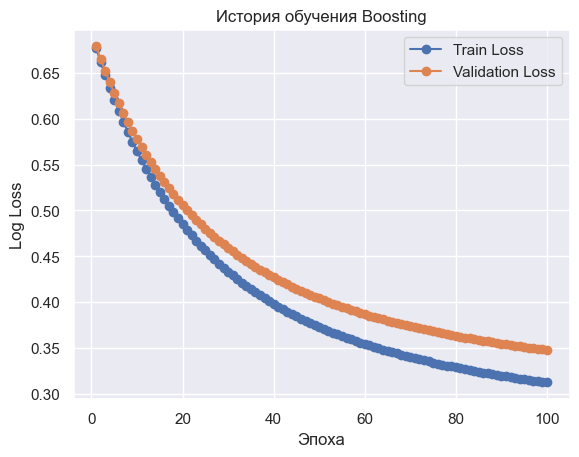

Время выполнения: 23.804425954818726 секунд
Train ROC-AUC 0.9998
Valid ROC-AUC 0.9072
Test ROC-AUC 0.9045


In [6]:
import time

boosting = Boosting(n_estimators=100)

start_time = time.time()
boosting.fit(X_train, y_train, X_valid, y_valid, plot = True)
end_time = time.time()

print(f"Время выполнения: {end_time - start_time} секунд")

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(X_test).shape == (X_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

---

## Задание 2. Имплементация гиперпараметров (2.5 балла + 3.5 бонус)

Бустинг, как метод агрегации, предлагает несколько вариантов регуляризации безотносительно базовой модели. В этом пункте предлагается имплементировать часть из них. При необходимости можете обратиться к реализациям в вашей любимой библиотеке, там могут быть дополнительные пояснения и/или ссылки на оригинальные статьи

<font color='lightcoral'>**Важно!**</font> После добавления каждого параметра проверьте, как это повлияет на качество. Специально крутить параметры не нужно, но важно увидеть, что перформанс модели изменился, в худшую или в лучшую сторону, для этого какие-то параметры нужны, пусть и от балды, <font color='lightcoral'>**дефолтные параметры не подойдут**</font>, они скорее для референса. Лучше всего это видно по графикам обучения <font color='lightcoral'>**на трейне и валидации**</font>, рекомендуется смотрить именно на них

### 2.1. Борьба с переобучением (0.5 балла)

Как известно, бустинги бывают склонны к переобучению. Чтобы этого не допустить, можно контролировать процесс обучения и проверять критерий останова на валидации. Реализуйте такую процедуру, не забудьте, что всю предобработку, что вы будете делать для трейна, нужно будет повторить на валидации

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| <td colspan=3>`early_stopping_rounds`, `eval_set` |

Добавьте параметры:
- `early_stopping_rounds: int | None = 0` — число раундов для критерия останова. Если качество ухудшается на протяжении всех раундов подряд, останавливаем обучение
- `X_val`, `y_val` или `eval_set: Tuple[np.ndarray] | None = None` — валидацонная выборка, на которой будем проверять переобучение

Эпоха 10: Трейн лосс=0.5645, Лосс на валидации=0.5775, Счетчик Δ лосс=0/2
Эпоха 20: Трейн лосс=0.4849, Лосс на валидации=0.5058, Счетчик Δ лосс=0/2
Эпоха 30: Трейн лосс=0.4334, Лосс на валидации=0.4590, Счетчик Δ лосс=0/2
Эпоха 40: Трейн лосс=0.3982, Лосс на валидации=0.4270, Счетчик Δ лосс=0/2
Эпоха 50: Трейн лосс=0.3731, Лосс на валидации=0.4040, Счетчик Δ лосс=0/2
Эпоха 60: Трейн лосс=0.3545, Лосс на валидации=0.3869, Счетчик Δ лосс=0/2
Эпоха 70: Трейн лосс=0.3402, Лосс на валидации=0.3736, Счетчик Δ лосс=0/2
Эпоха 80: Трейн лосс=0.3290, Лосс на валидации=0.3632, Счетчик Δ лосс=0/2
Эпоха 90: Трейн лосс=0.3200, Лосс на валидации=0.3547, Счетчик Δ лосс=0/2
Эпоха 100: Трейн лосс=0.3126, Лосс на валидации=0.3479, Счетчик Δ лосс=0/2


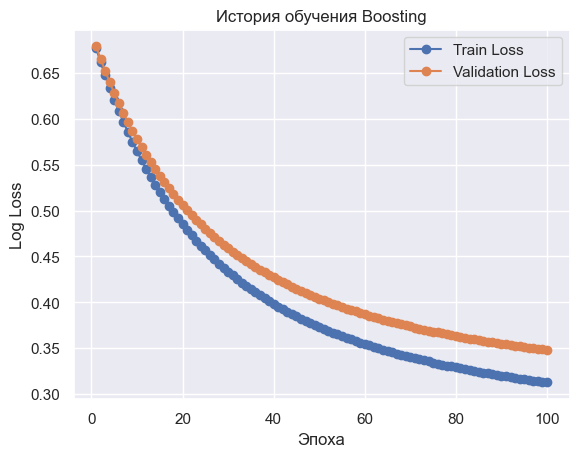

Время выполнения: 24.346998691558838 секунд
Train ROC-AUC 0.9998
Valid ROC-AUC 0.9076
Test ROC-AUC 0.9047


In [7]:
import time

boosting = Boosting(n_estimators=100, early_stopping_rounds = 2, learning_rate = 0.1)

start_time = time.time()
boosting.fit(X_train, y_train, X_valid, y_valid, plot = True)
end_time = time.time()

print(f"Время выполнения: {end_time - start_time} секунд")

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(X_test).shape == (X_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

### Бонус. Бустинг линейных моделей (0.5 балла)

**<font color='plum'>Вопрос:** что произойдет при ансамблировании линейных моделей? Имеет ли это смысл?</font>

<font color='plum'>**Ответ:**</font> Ансамблирование можно считать разновидностью композиции моделей. В ансамблевых методах несколько моделей объединяются для получения итогового предсказания усредненного, это позволяет улучшить точность и устойчивость по сравнению с отдельными моделями.

Давайте убедимся. Обучите бустинг, где в качестве базовой модели будет линейная регрессия. Обязательно сохраните историю функции потерь и зафиксируйте время обучения. Можно взять уже готовый из <font color='lightblue'>**XGBoost**</font>, но будьте готовы разобраться с тем, как оттуда достать историю обучения

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `XGBClassifier(booster="gblinear")` | — | — |

In [8]:
import xgboost as xgb
import time
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report

n_epochs = 100
start_time=time.time()
xgb = XGBClassifier(booster="gblinear", n_estimators = n_epochs,learning_rate = 0.1,random_state=42)
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb.fit(
    X_train, 
    y_train,
    eval_set=eval_set,
    verbose=True
)
end_time = time.time()
print(f"Время выполнения: {end_time - start_time} секунд")

xbg_preds_test = xgb.predict_proba(X_test)[:,1]
xbg_preds_val = xgb.predict_proba(X_valid)[:, 1]
xbg_preds_train = xgb.predict_proba(X_train)[:, 1]

auc_score_test = roc_auc_score(y_test, xbg_preds_test)
auc_score_val = roc_auc_score(y_valid, xbg_preds_val)
auc_score_train = roc_auc_score(y_train, xbg_preds_train)

print(f'Train ROC-AUC {auc_score_train:.4f}')
print(f"Valid ROC-AUC: {auc_score_val:.4f}")
print(f"Test ROC-AUC: {auc_score_test:.4f}")

[0]	validation_0-logloss:0.55764	validation_1-logloss:0.56752
[1]	validation_0-logloss:0.49720	validation_1-logloss:0.51194
[2]	validation_0-logloss:0.45341	validation_1-logloss:0.47249
[3]	validation_0-logloss:0.42014	validation_1-logloss:0.44317
[4]	validation_0-logloss:0.39401	validation_1-logloss:0.42069
[5]	validation_0-logloss:0.37293	validation_1-logloss:0.40296
[6]	validation_0-logloss:0.35557	validation_1-logloss:0.38868
[7]	validation_0-logloss:0.34102	validation_1-logloss:0.37700
[8]	validation_0-logloss:0.32865	validation_1-logloss:0.36729
[9]	validation_0-logloss:0.31801	validation_1-logloss:0.35914
[10]	validation_0-logloss:0.30877	validation_1-logloss:0.35223
[11]	validation_0-logloss:0.30068	validation_1-logloss:0.34632
[12]	validation_0-logloss:0.29354	validation_1-logloss:0.34123
[13]	validation_0-logloss:0.28722	validation_1-logloss:0.33687
[14]	validation_0-logloss:0.28158	validation_1-logloss:0.33308
[15]	validation_0-logloss:0.27653	validation_1-logloss:0.32979
[1

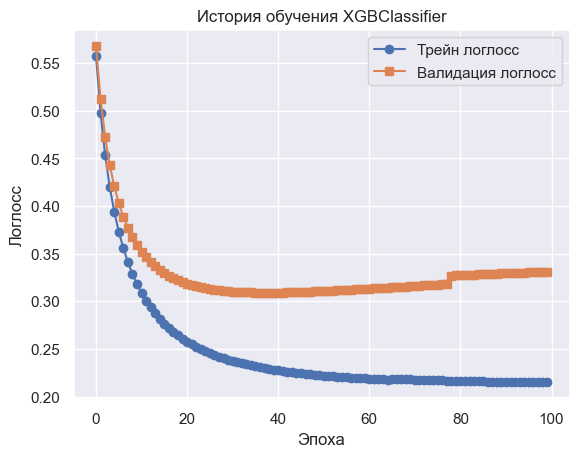

In [9]:
evals_result = xgb.evals_result()
# plt.figure(figsize=(14, 6))

plt.plot(range(0, n_epochs), evals_result['validation_0']['logloss'], label='Трейн логлосс', marker='o')
plt.plot(range(0, n_epochs), evals_result['validation_1']['logloss'], label='Валидация логлосс', marker='s')
plt.xlabel('Эпоха')
plt.ylabel('Логлосс')
plt.title('История обучения XGBClassifier')
plt.legend()
plt.grid(True)

Теперь возьмите `sklearn.linear_model.SGDClassifier` иобучите на тех же данных. Не забудьте вытащить историю функции потерь

In [10]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score, log_loss

sgd_clf = SGDClassifier(loss="log_loss", learning_rate='invscaling',eta0=0.1, 
                        random_state=42, max_iter=1, tol=None, warm_start=True)

train_loss_history = []
valid_loss_history = []

start_time = time.time()

classes = np.unique(y_train)
for epoch in range(n_epochs):
    sgd_clf.fit(X_train, y_train)
    
    train_probs = sgd_clf.predict_proba(X_train)[:, 1]
    valid_probs = sgd_clf.predict_proba(X_valid)[:, 1]
    
    train_loss = log_loss(y_train, train_probs)
    valid_loss = log_loss(y_valid, valid_probs)
    
    train_loss_history.append(train_loss)
    valid_loss_history.append(valid_loss)
    
    print(f"Эпоха {epoch+1}: Трейн лосс={train_loss:.4f}, Лосс на валидации={valid_loss:.4f}")
end_time = time.time()
print(f"Время выполнения: {end_time - start_time:.4f} секунд")

auc_score_train_sgd = roc_auc_score(y_train, sgd_clf.predict_proba(X_train)[:, 1])
auc_score_val_sgd   = roc_auc_score(y_valid, sgd_clf.predict_proba(X_valid)[:, 1])
auc_score_test_sgd  = roc_auc_score(y_test,  sgd_clf.predict_proba(X_test)[:, 1])

print(f"Train ROC-AUC: {auc_score_train_sgd:.4f}")
print(f"Valid ROC-AUC: {auc_score_val_sgd:.4f}")
print(f"Test  ROC-AUC: {auc_score_test_sgd:.4f}")

Эпоха 1: Трейн лосс=0.3192, Лосс на валидации=0.3611
Эпоха 2: Трейн лосс=0.2908, Лосс на валидации=0.3399
Эпоха 3: Трейн лосс=0.2768, Лосс на валидации=0.3301
Эпоха 4: Трейн лосс=0.2679, Лосс на валидации=0.3242
Эпоха 5: Трейн лосс=0.2616, Лосс на валидации=0.3202
Эпоха 6: Трейн лосс=0.2568, Лосс на валидации=0.3173
Эпоха 7: Трейн лосс=0.2531, Лосс на валидации=0.3152
Эпоха 8: Трейн лосс=0.2501, Лосс на валидации=0.3136
Эпоха 9: Трейн лосс=0.2476, Лосс на валидации=0.3123
Эпоха 10: Трейн лосс=0.2455, Лосс на валидации=0.3114
Эпоха 11: Трейн лосс=0.2438, Лосс на валидации=0.3106
Эпоха 12: Трейн лосс=0.2422, Лосс на валидации=0.3099
Эпоха 13: Трейн лосс=0.2409, Лосс на валидации=0.3094
Эпоха 14: Трейн лосс=0.2396, Лосс на валидации=0.3089
Эпоха 15: Трейн лосс=0.2386, Лосс на валидации=0.3085
Эпоха 16: Трейн лосс=0.2376, Лосс на валидации=0.3082
Эпоха 17: Трейн лосс=0.2367, Лосс на валидации=0.3079
Эпоха 18: Трейн лосс=0.2359, Лосс на валидации=0.3076
Эпоха 19: Трейн лосс=0.2352, Лосс на 

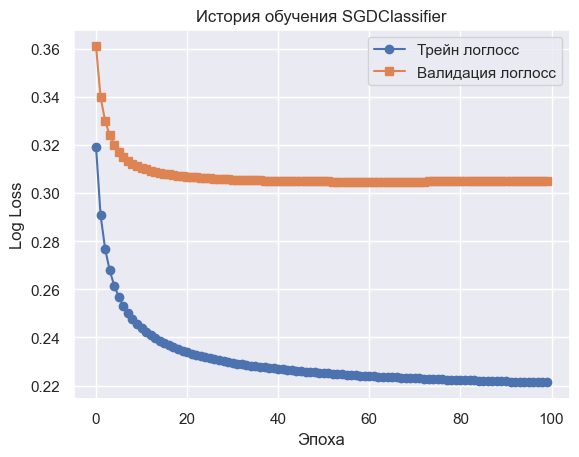

In [11]:
plt.plot(range(0, n_epochs), train_loss_history, label='Трейн логлосс', marker='o')
plt.plot(range(0, n_epochs), valid_loss_history, label='Валидация логлосс', marker='s')
plt.xlabel('Эпоха')
plt.ylabel('Log Loss')
plt.title('История обучения SGDClassifier')
plt.legend()
plt.grid(True)

Покажите на одном графике изменение функции потерь для бустинга и SGD классификатора. Сравните следующие детали у бустинга и линейной модели:

- время обучения
- сходимость (как быстро, как стабильно и прочее)
- графики функции потерь на трейне и на валидации

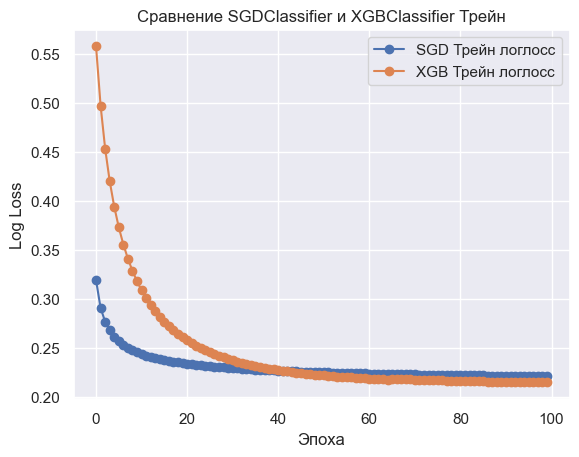

In [12]:
plt.plot(range(0, n_epochs), train_loss_history, label='SGD Трейн логлосс', marker='o')
plt.plot(range(0, n_epochs), evals_result['validation_0']['logloss'], label='XGB Трейн логлосс', marker='o')
plt.xlabel('Эпоха')
plt.ylabel('Log Loss')
plt.title('Сравнение SGDClassifier и XGBClassifier Трейн')
plt.legend()
plt.grid(True)

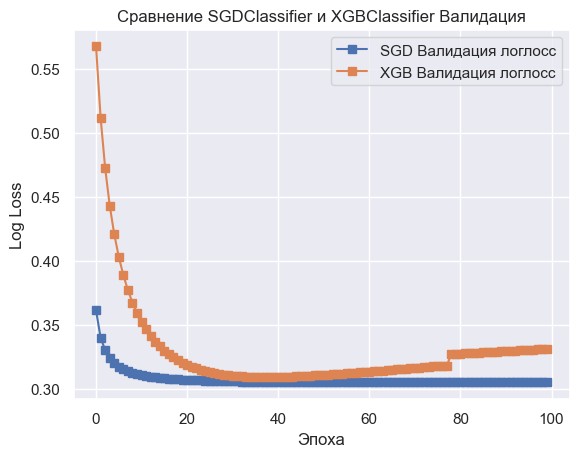

In [13]:
plt.plot(range(0, n_epochs), valid_loss_history, label='SGD Валидация логлосс', marker='s')
plt.plot(range(0, n_epochs), evals_result['validation_1']['logloss'], label='XGB Валидация логлосс', marker='s')
plt.xlabel('Эпоха')
plt.ylabel('Log Loss')
plt.title('Сравнение SGDClassifier и XGBClassifier Валидация')
plt.legend()
plt.grid(True)

<font color='plum'>**Вопрос:** Какой вывод вы можете сделать?</font>

<font color='plum'>**Ответ:**</font> На графиках сравниваются результаты обучения моделей SGDClassifier и XGBClassifier по метрике Log Loss.

Второй график (Валидация):

SGDClassifier (синяя линия) демонстрирует более стабильное снижение ошибки на валидационной выборке.
XGBClassifier (оранжевая линия) изначально быстрее снижает ошибку, но затем начинает расти, это может указывать на переобучение.

Второй график (Трейн):

SGDClassifier (синяя линия) показывает плавное и стабильное снижение Log Loss на обучающей выборке.
XGBClassifier (оранжевая линия) сначала быстро снижает ошибку, но затем замедляется и стабилизируется.
Вывод:
SGDClassifier показывает более стабильные результаты на валидации, в то время как XGBClassifier быстрее обучается, но может быть склонен к переобучению на более поздних этапах.

### 2.2. Бутстрап (0.5 балла)
Как известно, при обучении базовых алгоритмов в беггинге, используется бутстрапированная выборка. Звучит хайпово, почему бы не попробовать сделать то же самое в бустинге?

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `subsample`, — | `subsample`, `bagging`| `subsample`, `bootstrap_type`|

Вам нужно реализовать параметры:
- `subsample: float | int = 1.0` — доля или число объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей). Соответствует бутстрапу типа `Bernoulli`. Каждый объект либо входит в подвыборку, либо нет
- `bagging_temperature: float | int = 1.0` — веса объектов, которые попадают в выборку. Соответствует бутстрапу типа `Bayesian`. Каждый объект имеет определенный вес $t$, на который впоследствии домножается по формуле $w = (-\log(X))^t$, где $X \sim {U[0, 1]}$, после чего попадает в выборку. Таким образом можно сделать симуляцию повторений
- `bootstrap_type: str | None = 'Bernoulli'` — тип бутстрапа

<font color='plum'>**Вопрос:** как бутстрап может помочь в обучении с точки зрения смещения, разброса и вообще?</font>

<font color='plum'>**Ответ:**</font>
Бутстрап помогает в обучении следующим образом:

* Смещение: Обычно увеличивает смещение, так как модели обучаются на сгенерированных подвыборках, которые могут не достаточно полностью отражать исходные данные.
* Разброс: Снижает разброс за счёт усреднения предсказаний по множеству моделей, что уменьшает зависимость от одной обучающей выборки.
* Обобщающая способность: Улучшает за счёт создания ансамблей моделей (например, беггинг), что уменьшает вероятность переобучения.

Эпоха 10: Трейн лосс=0.4957, Лосс на валидации=0.5030, Счетчик Δ лосс=0/2
Эпоха 20: Трейн лосс=0.4098, Лосс на валидации=0.4204, Счетчик Δ лосс=0/2
Эпоха 30: Трейн лосс=0.3649, Лосс на валидации=0.3766, Счетчик Δ лосс=0/2
Эпоха 40: Трейн лосс=0.3382, Лосс на валидации=0.3504, Счетчик Δ лосс=0/2
Эпоха 50: Трейн лосс=0.3207, Лосс на валидации=0.3330, Счетчик Δ лосс=0/2
Эпоха 60: Трейн лосс=0.3084, Лосс на валидации=0.3209, Счетчик Δ лосс=0/2
Эпоха 70: Трейн лосс=0.2994, Лосс на валидации=0.3116, Счетчик Δ лосс=0/2
Эпоха 80: Трейн лосс=0.2925, Лосс на валидации=0.3044, Счетчик Δ лосс=0/2
Эпоха 90: Трейн лосс=0.2870, Лосс на валидации=0.2988, Счетчик Δ лосс=0/2
Эпоха 100: Трейн лосс=0.2826, Лосс на валидации=0.2942, Счетчик Δ лосс=0/2


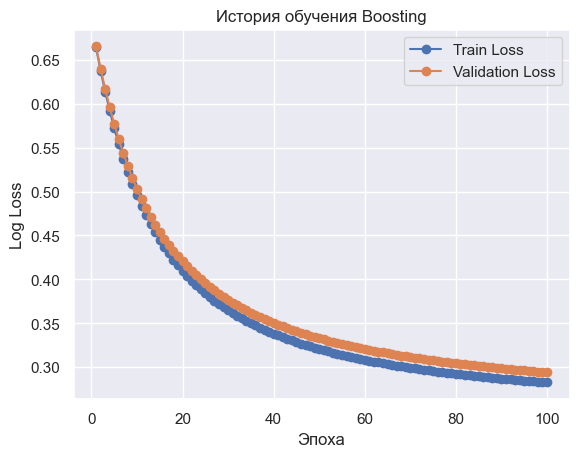

Время выполнения: 6.302811145782471 секунд
Train ROC-AUC 0.9943
Valid ROC-AUC 0.9295
Test ROC-AUC 0.9211


In [14]:
import time

boosting = Boosting(n_estimators=100, early_stopping_rounds = 2, learning_rate = 0.2, 
                    bootstrap_type = 'bernoulli', subsample = 0.1, bagging_temperature = 0.5)

start_time = time.time()
boosting.fit(X_train, y_train, X_valid, y_valid, plot = True)
end_time = time.time()

print(f"Время выполнения: {end_time - start_time} секунд")

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(X_test).shape == (X_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

### Бонус. GOSS (0.5 балла)

Заметим, что во время обучения не все объекты одинаково важны. Один из вариантов это исправить — ввести какие-то веса на объекты, однако можно пойти чуть хитрее. В <font color='lightgreen'>**LightGBM**</font> придумали подход [Gradient-based One-side Sampling](https://www.microsoft.com/en-us/research/wp-content/uploads/2017/11/lightgbm.pdf)

Давайте оценивать важность объектов в отдельный момент обучения нового дерева. Будем считать, какой антиградиент привносит каждый объект. Далее разобъем градиенты на 2 группы. Объекты с большими градиентами берутся все, с маленькими — только часть, по аналогии с бутстрапом, с отрицательными — выкидываются. И не забываем домножить на фактор, чтобы учесть выкинутые объекты. Подробнее в статье

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| — | `bagging='goss'`| `bootstrap_type='MVS'`|

Параметры, которые нужно сделать:

- `goss: bool | None = False` — GOSS бустинг или нет
- `goss_k: float | int = 0.2` — доля объектов, градиенты которых будем считать большими. Все остальное — маленькими
- `subsample: float | int = 0.3` — параметры сэмплинга для маленьких градиентов из пункта 2.1

In [15]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

### 2.3. Работа с признаками (1 балл)

1. Помимо выбора случайных объектов, есть идея выбирать случайное подмножество признаков, заложенная в Random Forest. Мотивация это делать точно та же самая, что и в бутстрапировании, за это будет отвечать `rsm`

2. С другой стороны, вместо того, чтобы выкидывать признаки, можно попробовать проредить их множество значений, применив бинаризацию. В идеале это стоит делать с датасетом до обучения модели, но не обязательно, можно, например, на этапе `fit`, а в `partial_fit` приходит уже квантизованный датасет. Для этого существует множество алгоритмов, мы предлагаем сделать два наиболее простых:

- $\text{Uniform}$. Значения признака $[\min f_i, \max f_i]$ отображаются в `nbins` отрезков одинаковой длины, которые полностью покрывают интервал
- $\text{Quantile}$. Тот же самый отрезок сортируется и бьется на `nbins` квантилей от 0 до 1

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `colsample_bytree`, `tree_method` | `colsample_bytree`, `max_bin`| `rsm`, `quantize(...)`|

Нужно добавить параметры:
- `rsm: float | int = 1.0` — доля или число признаков, участвующих в обучении модели. Каждый признак либо входит, либо не входит в пул, на котором обучается базовый алгоритм, по аналогии с бутстрапом Бернулли
- `quantization_type: str | None = None` — тип квантизации, если она есть
- `nbins: int = 255` — число бинов для квантизации. Игнорируем, если тип квантизации не указан

<font color='plum'>**Вопрос**: как квантизация поможет в обработке выбросов и нанов?</font>

<font color='plum'>**Ответ**: ... </font>

<font color='plum'>**Вопрос**: можно ли просто заполнить наны каким-то числом? Имеет ли значение, что это за число (-1, -100, -1e32)?</font>

<font color='plum'>**Ответ**: ... </font>

### Бонус. Квантизация (1.5 балл)

В текущих имплементациях бустинга используются более сложные методы квантизации. К сожалению, способы выше страдают либо от неравноправности бинов — в каких-то объектов больше, в каких-то меньше, либо от того, что целевая переменная от бинов зависит опосредованно. Предлагается это исправить следующими способами:

1. $\text{MinEntropy}$. Это [один из методов](https://catboost.ai/docs/en/concepts/quantization), который используется для бинаризации в <font color='palegoldenrod'>**CatBoost**</font>, остальные на него очень похожи. Будем жадно набирать бины так, чтобы энтропия объектов внутри ($\sum_{i \in \text{bin}} x_i\log(x_i)$) была как можно меньше. Сделать такое разбиение руками непросто, но вам эта задача должна что-то напоминать
   
2. $\text{PiecewiseEncoding}$. Это относительно свежий метод для [табличных трансформеров](https://arxiv.org/pdf/2203.05556). Суть заключается в том, что бины для квантизации будем брать не с потолка, а именно те, что нужны для разбиения таргета. (В статье делается кодирование в вектор длины $T$, где $T$ число бинов, в нашем случае это излишне, бинов можно оставить столько же, но взять лмшь закодированную по формуле часть)

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| — | — | `feature_border_type="Piecewise"` |

Нужно добавить опцию:

- `'MinEntropy'` для `quantization_type` — какую квантизацию используем

Реализуйте оба способа подсчета (или один, но тогда балл неполный) и сравните, удалось ли улучшить качество?

In [16]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

### 2.4. Важность признаков (0.5 балла)

Поскольку наша базовая модель — это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными — иначе вы что-то сделали не так). Разумеется, способ не единственный, если хочется, посмотрите в документации

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `model.get_score()` | `lightgbm.importance()` | `model.get_feature_importance()` |

Допишите к бустингу:
- `feature_importances_` — атрибут, который возвращает важность признаков, согласно методу выше

In [17]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

Покажите, какие признаки оказались самыми важными

In [18]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

### Бонус. DART (1.5 балла)

Ранее мы обсуждали, что каждый базовый алгоритм пытается исправить ошибки всего предыдущего ансамбля. Из-за этого возникает неравноправие — каждая новая модель вносит все меньший и меньший вклад. Уверенные обучатели нейросетей знают, что это может привести к переобучению. Но выход есть, и выход этот [DART](https://arxiv.org/pdf/1505.01866)!

В DL есть такой вид регуляризации, как dropout, когда некоторые узлы нейросети со случайным шансом отключаются. Можно попробовать обобщить этот подход на случай бустингов и случайно выкидывать деревья из композиции во время обучения

1. Выбираем, какие деревья убрать. При подсчете антиградиента берем не весь ансамбль, а только ту часть, что осталась
2. Домножаем выходы дерева на $1/k$, где $k$ — число удаленных деревьев, чтобы учесть тот факт, что ансамбль был не весь. Тогда вклад отдельного дерева будет не настолько большим
3. Домножаем выходы выкинутых деревьев на $k/(k+1)$, чтобы масштабы выходов примерно совпадали

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `XGBClassifier(booster="dart")` | `LGBMClassifier(boosting_type="dart")` | — |

Параметры, которые нужно добавить:

- `dart: bool | None = False` — DART бустинг или нет
- `dropout_rate: int | float = 0.05` — доля деревьев, которую выкидываем во время обучения DART

In [19]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

------

## Задание 3. Оптимизация (3.5 балла + 0.5 бонус)

Теперь давайте подумаем, как же правильно применять бустинги. Нас интересует: какие бустинги вообще бывают, как их правильно тюнить, и как интерпретировать

Оптимизация моделей с большим числом гиперпараметров это сложное дело. Нетрудно догадаться, что в случае, когда параметров $m$, сложность перебора в самом худшем случае будет порядка $n^m$. У бустингов, хотя на самом деле не только, эта проблема стоит особенно остро. Подумаем, как это делать умнее

### 3.1. Знакомство с optuna (1 балл)

Для эффективного подбора гиперпараметров существует несколько решений, основанных на байесовской оптимизации. В этом задании предлагается познакомиться с библиотекой [optuna](https://optuna.org/), которая делает перебор гиперпараметров легким и приятным, а также сохраняет всю историю экспериментов в одно место за вас

Подберите на валидации оптимальные значения следующих гиперпараметров для вашей реализации бустинга:
- `max_depth`
- `n_estimators`
- `learning_rate`
- любые другие параметры, которые вам понравились

Заметим, что оптуна это крайне гибкая библиотека, в которой можно реализовать абсолютно любую логику, которую пожелаете. За вас там есть лишь выбор модели. Чтобы не плодить несколько `objective`, можно слегка менять тело функции, например, добавить опциональные параметры, но шаблоном пользоваться не обязательно, как обычно

Подберите диапазон параметров самостоятельно, не забывайте фиксировать сид (нет, его не нужно перебирать). Сохраните и покажите оптимальный набор параметров. Сравните графики функций потерь для оптимального и дефолтного бустингов. Покажите, какие параметры дали наибольший прирост (для этого придется почитать документацию оптуны)

In [20]:
import optuna
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 20, 200)
    learning_rate = trial.suggest_float('learning_rate', 1e-3, 0.5, log=True)
    subsample = trial.suggest_float('subsample', 0.2, 1.0)
    
    max_depth = trial.suggest_int('max_depth', 3, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    
    base_model_params = {
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'random_state': 42
    }
    
    boosting = Boosting(
        base_model_params=base_model_params,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        early_stopping_rounds=2,
        epsilon=1e-4,
        subsample=subsample,
        bagging_temperature=1.0,
        bootstrap_type='bernoulli'
    )
    
    boosting.fit(X_train, y_train, X_val=X_valid, y_val=y_valid, plot=False)
    score_val = boosting.score(X_valid, y_valid)
    return score_val

study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=10, show_progress_bar=True)

print("Best Boosting params:")

[I 2024-12-22 23:46:23,940] A new study created in memory with name: no-name-1cceb8fd-29b4-4ab1-9b7a-1ba8302c31e1


  0%|          | 0/10 [00:00<?, ?it/s]

Эпоха 10: Трейн лосс=0.4205, Лосс на валидации=0.4278, Счетчик Δ лосс=0/2
Эпоха 20: Трейн лосс=0.3474, Лосс на валидации=0.3556, Счетчик Δ лосс=0/2
Эпоха 30: Трейн лосс=0.3158, Лосс на валидации=0.3241, Счетчик Δ лосс=0/2
Эпоха 40: Трейн лосс=0.2985, Лосс на валидации=0.3065, Счетчик Δ лосс=0/2
Эпоха 50: Трейн лосс=0.2878, Лосс на валидации=0.2955, Счетчик Δ лосс=0/2
Эпоха 60: Трейн лосс=0.2804, Лосс на валидации=0.2878, Счетчик Δ лосс=0/2
Эпоха 70: Трейн лосс=0.2750, Лосс на валидации=0.2821, Счетчик Δ лосс=0/2
Эпоха 80: Трейн лосс=0.2710, Лосс на валидации=0.2777, Счетчик Δ лосс=0/2
Эпоха 87: Трейн лосс=0.2687, Лосс на валидации=0.2753, Счетчик Δ лосс=0/2
[I 2024-12-22 23:46:30,946] Trial 0 finished with value: 0.9364296757828059 and parameters: {'n_estimators': 87, 'learning_rate': 0.36808608148776095, 'subsample': 0.7855951534491241, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.9364296757828059.
Эпоха 10: Трейн лосс=0.4891, Лосс на 

In [21]:
print(study.best_params)
print("Best ROC-AUC on validation:", study.best_value)

{'n_estimators': 102, 'learning_rate': 0.13157287601765633, 'subsample': 0.3597390257266878, 'max_depth': 9, 'min_samples_split': 13, 'min_samples_leaf': 1}
Best ROC-AUC on validation: 0.9379310730161163


### 3.2. Глубокая оптимизация (1 балл)

Помимо эффективного перебора гиперпараметров, `optuna` предлагает более тонкий контроль над самой процедурой обучения. Улучшите процедуру оптимизации следующим образом:

1. Посмотрите, как в `optuna` устроена запись в хранилища, и добавьте это в пайплайн оптимизации. Без указания БД все запуски оптуны сотрутся, как только закончится сессия. Более того, так можно распараллелить процесс оптимизации на несколько машин
2. Посмотрите, как можно контролировать процесс обучения бустинга при помощи прунера. У библиотечных имплементаций есть уже готовые, их можно использовать пунктом ниже. Для кастомной модели возьмите что-то из `optuna.pruners`. Идея прунера — не обучать бустинг до конца, если по истории видно, что другие бустинги на этом этапе статистически лучше.
3. Добавьте сохранение истории функции потерь и времени обучения в качестве `user_attribute` сразу в `study`. Мы не хотим оптимизировать их напрямую, но они нам понадобится для сравнения моделей в дальнейшем

Добавьте хранилище и юзер атрибуты и посмотрите, ускорилась ли оптимизация с добавлением прунера

In [22]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

### 3.3. Готовые реализации (1 балл)

Библиотек для бустингов существует много, но активно используются лишь три. Ваша задача — попробовать их в деле, посмотреть на их уникальные фишки и понять, что вам нравится больше всего

Возьмите любую из популярных библиотек: <font color='lightblue'>`xgboost`</font>, <font color='lightgreen'>`lightgbm`</font>, <font color='palegoldenrod'>`catboost`</font>.
Ваша задача — взять одну из них, подобрать те же оптимальные параметры, что и выше, плюс что-то, что вам понравилось в них больше всего (может быть абсолютно любая фишка из пунктов выше или что-то, что вы найдете сами, не обязательно эксклюзивное), и сравнить две оптимизированные модели по
- динамике функции потерь (на обучающей и на валидационной выборке)
- времени обучения

In [23]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import catboost as cb
from catboost import CatBoostClassifier
import optuna

In [24]:
def objective(trial):
    params = {
        "iterations": 20,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.5, log=True),
        "depth": trial.suggest_int("depth", 3, 15),
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = cb.CatBoostClassifier(**params, loss_function='Logloss', random_state=42)
    model.fit(X_train, y_train.reshape(-1,1))
    predictions = model.predict_proba(X_valid)[:, 1]
    roc = roc_auc_score(y_valid, predictions)
    return roc

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

[I 2024-12-22 23:47:11,378] A new study created in memory with name: no-name-0c86f094-58c3-4759-9a39-5dbe16cee444
[I 2024-12-22 23:47:11,564] Trial 0 finished with value: 0.9100989517357859 and parameters: {'learning_rate': 0.0031867832587745546, 'depth': 3, 'subsample': 0.6410305471282124, 'min_data_in_leaf': 15}. Best is trial 0 with value: 0.9100989517357859.
[I 2024-12-22 23:47:11,658] Trial 1 finished with value: 0.9394456404005962 and parameters: {'learning_rate': 0.08685580119728993, 'depth': 7, 'subsample': 0.32709793286238487, 'min_data_in_leaf': 19}. Best is trial 0 with value: 0.9100989517357859.


0:	learn: 0.6901126	total: 68ms	remaining: 1.29s
1:	learn: 0.6866414	total: 70.4ms	remaining: 634ms
2:	learn: 0.6838406	total: 72.3ms	remaining: 409ms
3:	learn: 0.6804380	total: 74.6ms	remaining: 298ms
4:	learn: 0.6772318	total: 76.5ms	remaining: 229ms
5:	learn: 0.6744729	total: 78.5ms	remaining: 183ms
6:	learn: 0.6717242	total: 80.5ms	remaining: 149ms
7:	learn: 0.6685328	total: 82.1ms	remaining: 123ms
8:	learn: 0.6658284	total: 85.4ms	remaining: 104ms
9:	learn: 0.6628137	total: 88ms	remaining: 88ms
10:	learn: 0.6598198	total: 89.8ms	remaining: 73.5ms
11:	learn: 0.6569572	total: 91.4ms	remaining: 60.9ms
12:	learn: 0.6543096	total: 93.5ms	remaining: 50.3ms
13:	learn: 0.6517464	total: 95.8ms	remaining: 41ms
14:	learn: 0.6491204	total: 99.1ms	remaining: 33ms
15:	learn: 0.6465793	total: 101ms	remaining: 25.2ms
16:	learn: 0.6441264	total: 103ms	remaining: 18.1ms
17:	learn: 0.6412042	total: 105ms	remaining: 11.6ms
18:	learn: 0.6387527	total: 106ms	remaining: 5.61ms
19:	learn: 0.6362050	total

[I 2024-12-22 23:47:11,736] Trial 2 finished with value: 0.9210916379118366 and parameters: {'learning_rate': 0.007376047205648052, 'depth': 5, 'subsample': 0.5729077654644757, 'min_data_in_leaf': 58}. Best is trial 0 with value: 0.9100989517357859.
[I 2024-12-22 23:47:11,835] Trial 3 finished with value: 0.9376652754197885 and parameters: {'learning_rate': 0.07441002718533953, 'depth': 7, 'subsample': 0.4576336364021201, 'min_data_in_leaf': 84}. Best is trial 0 with value: 0.9100989517357859.
[I 2024-12-22 23:47:11,898] Trial 4 finished with value: 0.918880648897339 and parameters: {'learning_rate': 0.010357445510798972, 'depth': 4, 'subsample': 0.7342699337246292, 'min_data_in_leaf': 49}. Best is trial 0 with value: 0.9100989517357859.


13:	learn: 0.5891764	total: 38.6ms	remaining: 16.5ms
14:	learn: 0.5826401	total: 41.5ms	remaining: 13.8ms
15:	learn: 0.5763378	total: 44.7ms	remaining: 11.2ms
16:	learn: 0.5701126	total: 48.5ms	remaining: 8.56ms
17:	learn: 0.5644403	total: 52.2ms	remaining: 5.79ms
18:	learn: 0.5588648	total: 54.6ms	remaining: 2.87ms
19:	learn: 0.5533695	total: 57.1ms	remaining: 0us
0:	learn: 0.6078568	total: 5.09ms	remaining: 96.8ms
1:	learn: 0.5358509	total: 9.45ms	remaining: 85ms
2:	learn: 0.4874768	total: 12.6ms	remaining: 71.4ms
3:	learn: 0.4472631	total: 16.3ms	remaining: 65.4ms
4:	learn: 0.4114259	total: 20.6ms	remaining: 61.9ms
5:	learn: 0.3867142	total: 24.6ms	remaining: 57.4ms
6:	learn: 0.3661953	total: 28.2ms	remaining: 52.4ms
7:	learn: 0.3499055	total: 32ms	remaining: 48ms
8:	learn: 0.3342482	total: 35.7ms	remaining: 43.6ms
9:	learn: 0.3240854	total: 39.9ms	remaining: 39.9ms
10:	learn: 0.3139430	total: 43.5ms	remaining: 35.6ms
11:	learn: 0.3046158	total: 47.1ms	remaining: 31.4ms
12:	learn: 0

[I 2024-12-22 23:47:11,993] Trial 5 finished with value: 0.9438121441564837 and parameters: {'learning_rate': 0.19175380422157312, 'depth': 7, 'subsample': 0.6663722457203491, 'min_data_in_leaf': 60}. Best is trial 0 with value: 0.9100989517357859.


0:	learn: 0.5025983	total: 6.09ms	remaining: 116ms
1:	learn: 0.3947478	total: 9.95ms	remaining: 89.5ms
2:	learn: 0.3447995	total: 13.5ms	remaining: 76.3ms
3:	learn: 0.3148587	total: 17.1ms	remaining: 68.5ms
4:	learn: 0.2942375	total: 20.4ms	remaining: 61.1ms
5:	learn: 0.2814164	total: 24.5ms	remaining: 57.1ms
6:	learn: 0.2696212	total: 29.6ms	remaining: 54.9ms
7:	learn: 0.2605544	total: 33.7ms	remaining: 50.6ms
8:	learn: 0.2546420	total: 37.6ms	remaining: 46ms
9:	learn: 0.2486585	total: 41.4ms	remaining: 41.4ms
10:	learn: 0.2439851	total: 45.7ms	remaining: 37.4ms
11:	learn: 0.2401779	total: 48.8ms	remaining: 32.6ms
12:	learn: 0.2359930	total: 52.3ms	remaining: 28.2ms
13:	learn: 0.2331736	total: 55.6ms	remaining: 23.8ms
14:	learn: 0.2304561	total: 58.9ms	remaining: 19.6ms
15:	learn: 0.2271617	total: 62.3ms	remaining: 15.6ms
16:	learn: 0.2251567	total: 65.6ms	remaining: 11.6ms
17:	learn: 0.2232232	total: 68.9ms	remaining: 7.65ms
18:	learn: 0.2217039	total: 72.2ms	remaining: 3.8ms
19:	lea

[I 2024-12-22 23:47:12,437] Trial 6 finished with value: 0.9302337183008429 and parameters: {'learning_rate': 0.0027187918471816824, 'depth': 11, 'subsample': 0.5334355243586968, 'min_data_in_leaf': 69}. Best is trial 0 with value: 0.9100989517357859.
[I 2024-12-22 23:47:12,496] Trial 7 finished with value: 0.9216491743113406 and parameters: {'learning_rate': 0.024366544744926555, 'depth': 4, 'subsample': 0.21944763942939086, 'min_data_in_leaf': 34}. Best is trial 0 with value: 0.9100989517357859.


15:	learn: 0.6378079	total: 339ms	remaining: 84.9ms
16:	learn: 0.6344677	total: 367ms	remaining: 64.7ms
17:	learn: 0.6312119	total: 390ms	remaining: 43.4ms
18:	learn: 0.6278796	total: 398ms	remaining: 20.9ms
19:	learn: 0.6246189	total: 421ms	remaining: 0us
0:	learn: 0.6691383	total: 2.33ms	remaining: 44.3ms
1:	learn: 0.6460226	total: 4.12ms	remaining: 37.1ms
2:	learn: 0.6246494	total: 5.62ms	remaining: 31.8ms
3:	learn: 0.6025552	total: 7.44ms	remaining: 29.8ms
4:	learn: 0.5863698	total: 9.37ms	remaining: 28.1ms
5:	learn: 0.5680806	total: 11.7ms	remaining: 27.3ms
6:	learn: 0.5491633	total: 14.2ms	remaining: 26.4ms
7:	learn: 0.5334533	total: 16.1ms	remaining: 24.1ms
8:	learn: 0.5188611	total: 17.9ms	remaining: 21.9ms
9:	learn: 0.5066830	total: 19.8ms	remaining: 19.8ms
10:	learn: 0.4936488	total: 21.5ms	remaining: 17.6ms
11:	learn: 0.4825819	total: 23.8ms	remaining: 15.9ms
12:	learn: 0.4718030	total: 26.1ms	remaining: 14.1ms
13:	learn: 0.4606469	total: 28.3ms	remaining: 12.1ms
14:	learn: 

[I 2024-12-22 23:47:12,563] Trial 8 finished with value: 0.921644385165461 and parameters: {'learning_rate': 0.0087566467519434, 'depth': 5, 'subsample': 0.3314731351346749, 'min_data_in_leaf': 33}. Best is trial 0 with value: 0.9100989517357859.
[I 2024-12-22 23:47:12,670] Trial 9 finished with value: 0.9314928645717346 and parameters: {'learning_rate': 0.01805369732968369, 'depth': 8, 'subsample': 0.4696888937914146, 'min_data_in_leaf': 64}. Best is trial 0 with value: 0.9100989517357859.


16:	learn: 0.5553305	total: 41.7ms	remaining: 7.35ms
17:	learn: 0.5489987	total: 43.7ms	remaining: 4.86ms
18:	learn: 0.5425927	total: 45.6ms	remaining: 2.4ms
19:	learn: 0.5370971	total: 47.8ms	remaining: 0us
0:	learn: 0.6690057	total: 4.58ms	remaining: 87.1ms
1:	learn: 0.6467756	total: 9.76ms	remaining: 87.9ms
2:	learn: 0.6267405	total: 13.8ms	remaining: 78.4ms
3:	learn: 0.6066932	total: 18.1ms	remaining: 72.3ms
4:	learn: 0.5904143	total: 22.1ms	remaining: 66.4ms
5:	learn: 0.5730882	total: 27.2ms	remaining: 63.5ms
6:	learn: 0.5559500	total: 31.6ms	remaining: 58.7ms
7:	learn: 0.5403610	total: 36ms	remaining: 53.9ms
8:	learn: 0.5252383	total: 40.2ms	remaining: 49.1ms
9:	learn: 0.5113648	total: 44.6ms	remaining: 44.6ms
10:	learn: 0.4977199	total: 48.7ms	remaining: 39.8ms
11:	learn: 0.4859030	total: 52.7ms	remaining: 35.1ms
12:	learn: 0.4744003	total: 56.9ms	remaining: 30.7ms
13:	learn: 0.4637816	total: 61ms	remaining: 26.1ms
14:	learn: 0.4542425	total: 64.9ms	remaining: 21.6ms
15:	learn: 

<font color='plum'>**Вопрос:** Какая архитектура вам нравится больше всего и почему?</font>

<font color='plum'>**Ответ**: ... </font>

### Бонус. Random Forest (0.5 балла)

Если очень захотеть, оптуна может оптимизировать все, что угодно, даже нейросети. Давайте противопоставим бустингу его злейшего врага — алгоритм Random Forest.

Возьмите реализацию случайного леса из <font color='lightgreen'>`lightgbm`</font>. Посмотрите, какие там есть гиперпараметры, переберите что-либо из них вместе с `max_depth` и `n_estimators`.

Сравните его качество и динамику функции потерь (на обучающей и на валидационной выборке) с таковыми у бустинга и сделайте вывод, а нужен ли Random Forest?

In [25]:
import optuna
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

def objective(trial):
    param = {'boosting_type': 'rf',
             'max_depth': trial.suggest_int('max_depth', 2, 10),
            'n_estimators': trial.suggest_int('n_estimators', 10, 200),
            'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1.0),
            'num_leaves': trial.suggest_int('num_leaves', 20, 100),
            'random_state': 42, 
             'verbose': -1
            }
    model = lgb.LGBMClassifier(**param)
    model.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_valid, y_valid)], eval_metric='logloss')
    pred = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, pred)
    return np.round(roc_auc, 5)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)

print("Best Gradient Boosting params:")
print(study.best_params)
print(study.best_value)

[I 2024-12-22 23:47:13,385] A new study created in memory with name: no-name-40254d58-f8fc-4c64-940c-4350dde3e3e9
[I 2024-12-22 23:47:13,679] Trial 0 finished with value: 0.9302 and parameters: {'max_depth': 9, 'n_estimators': 130, 'feature_fraction': 0.7908851856739754, 'num_leaves': 31}. Best is trial 0 with value: 0.9302.
[I 2024-12-22 23:47:13,816] Trial 1 finished with value: 0.91156 and parameters: {'max_depth': 2, 'n_estimators': 180, 'feature_fraction': 0.6532566076505071, 'num_leaves': 73}. Best is trial 0 with value: 0.9302.
[I 2024-12-22 23:47:14,025] Trial 2 finished with value: 0.92816 and parameters: {'max_depth': 5, 'n_estimators': 118, 'feature_fraction': 0.7146453115704916, 'num_leaves': 46}. Best is trial 0 with value: 0.9302.
[I 2024-12-22 23:47:14,253] Trial 3 finished with value: 0.9323 and parameters: {'max_depth': 7, 'n_estimators': 59, 'feature_fraction': 0.6050800008074824, 'num_leaves': 73}. Best is trial 3 with value: 0.9323.
[I 2024-12-22 23:47:14,496] Trial

Best Gradient Boosting params:
{'max_depth': 7, 'n_estimators': 59, 'feature_fraction': 0.6050800008074824, 'num_leaves': 73}
0.9323


### 3.4. Бустинг и вероятности (0.5 балла)

С качеством мы более-менее разобрались, но что насчет вероятностей? Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности?

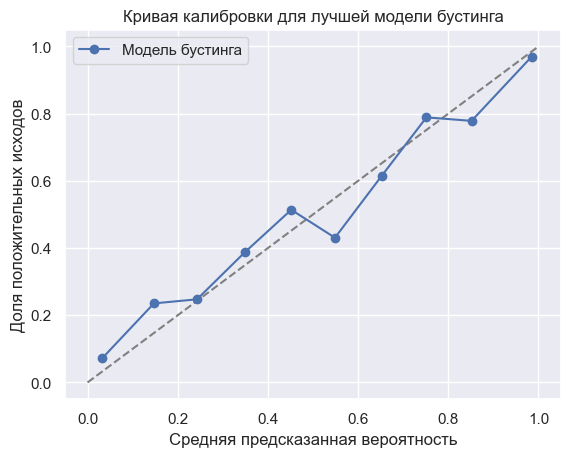

In [29]:
from sklearn.calibration import calibration_curve

fop, mpv = calibration_curve(y_test, xbg_preds_test, n_bins=10)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.plot(mpv, fop, 'o-', label='Модель бустинга')

plt.title("Кривая калибровки для лучшей модели XGBoost")
plt.xlabel("Средняя предсказанная вероятность")
plt.ylabel("Доля положительных исходов")
plt.legend()
plt.grid(True)

Модель в целом неплохо калибрована, но есть некоторые отклонения от идеальной линии, особенно в области низких и средних вероятностей. Улучшение калибровки может повысить качество вероятностных предсказаний.


Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

ROC-AUC на обучающей выборке: 0.9700
ROC-AUC на тестовой выборке: 0.9377


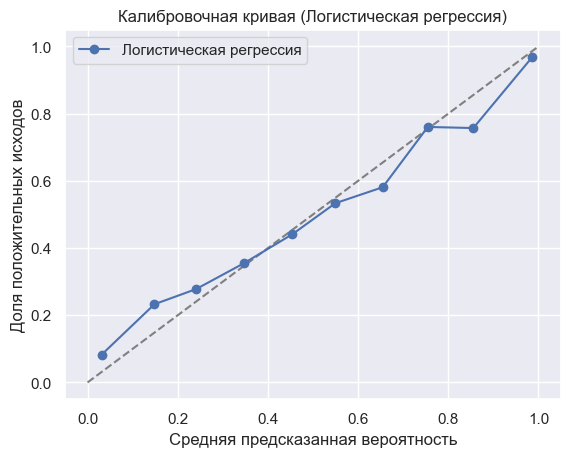

In [31]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

logreg_preds_test = logreg.predict_proba(X_test)[:,1]
logreg_preds_train = logreg.predict_proba(X_train)[:, 1]

auc_score_test_logreg = roc_auc_score(y_test, logreg_preds_test)
auc_score_train_logreg = roc_auc_score(y_train, logreg_preds_train)

print(f'ROC-AUC на обучающей выборке: {auc_score_train_logreg:.4f}')
print(f'ROC-AUC на тестовой выборке: {auc_score_test_logreg:.4f}')

fop_logreg, mpv_logreg = calibration_curve(y_test, logreg_preds_test, n_bins=10)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.plot(mpv_logreg, fop_logreg, 'o-', label='Логистическая регрессия')

plt.title("Калибровочная кривая (Логистическая регрессия)")
plt.xlabel("Средняя предсказанная вероятность")
plt.ylabel("Доля положительных исходов")
plt.legend()
plt.grid(True)


Модель логистической регрессии в целом хорошо калибрована, предсказанные вероятности близки к реальной доле положительных классов, с небольшими отклонениями в области низких и высоких вероятностей.

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2025 года?

<img src = 'https://sun9-29.userapi.com/impg/yGlExz26LenJBLYgCgYf2ZrIbYkaGn4kxQa6qQ/ho6ZPtB-Rmg.jpg?size=720x1280&quality=95&sign=6999a36395e41f89776ea3c4d4e1a31f&type=album![image.png](attachment:image.png)' width = 300>

Надеюсь, что сохраню стипендию в этом году. Макру закрыла, но надо будет сходить на экзамен, чтобы была 6. Поняла, что не люблю этот предмет ну совсем, грустно, что потратила столько времени и сил на нее и теперь по другим предметам так себе знания. Аня, поздравляю с наступающим новым годом! Успехов во всех начинаниях, пусть все получится! Спасибо, что проверяла мои домашки

# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚